# Telecom Churn Prediction Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br>
<br>
## Goal of this case study
<br>
Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Step 1 : Import the Dataset

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [2]:
#Read dataset
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
#preview the data set
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#explore the shape of the data frame
telecom.shape

(99999, 226)

In [5]:
#See the column names which contains rech
pd.set_option('display.max_columns', None)
print(telecom.columns[telecom.columns.str.contains('_rech')])

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


## Step 2 : Data Preparation

#### 2.1 Derive new features

`As per our problem statement, we need to consider only those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).`

In [6]:
#Describing the afore-mentioned columns  for identifying the 70th percentile.
cols_to_consider = ['total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7','max_rech_amt_6','max_rech_amt_7'
                    ,'total_rech_data_6','total_rech_data_7','max_rech_data_6','max_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']
telecom[cols_to_consider].describe(percentiles=[0.2,0.5,0.7,0.9,0.99])

,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,25153.000000,25571.000000,25153.000000,25571.000000
mean,7.558806,7.700367,327.514615,322.962970,104.637486,104.752398,2.463802,2.666419,126.393392,126.729459,192.600982,200.981292
std,7.078405,7.070422,398.019701,408.114237,120.614894,124.523970,2.789128,3.031593,108.477235,109.765267,192.646318,196.791224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
20%,3.000000,3.000000,80.000000,65.000000,30.000000,30.000000,1.000000,1.000000,25.000000,25.000000,51.000000,68.000000
50%,6.000000,6.000000,230.000000,220.000000,110.000000,110.000000,1.000000,1.000000,145.000000,145.000000,154.000000,154.000000
70%,8.000000,8.000000,378.000000,370.000000,110.000000,120.000000,2.000000,2.000000,154.000000,154.000000,218.000000,237.000000
90%,15.000000,16.000000,732.000000,731.000000,202.000000,200.000000,5.000000,6.000000,252.000000,252.000000,358.000000,396.000000
99%,35.000000,35.000000,1683.020000,1728.000000,550.000000,550.000000,14.000000,14.000000,505.000000,455.000000,907.000000,951.000000
max,307.000000,138.000000,35190.000000,40335.000000,4010.000000,4010.000000,61.000000,54.000000,1555.000000,1555.000000,7546.000000,4365.000000


In [7]:
# Checking the percentage of missing values of the recharge columns
round(100*(telecom[cols_to_consider].isnull().sum()/len(telecom.index)), 2).sort_values()

total_rech_num_6       0.00
total_rech_num_7       0.00
total_rech_amt_6       0.00
total_rech_amt_7       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
total_rech_data_7     74.43
max_rech_data_7       74.43
av_rech_amt_data_7    74.43
total_rech_data_6     74.85
max_rech_data_6       74.85
av_rech_amt_data_6    74.85
dtype: float64

We see more then **74%** values for **recharge** related data are missing.

In [8]:
#Replace null values of total recharge data column of 6,7,8 with 0
telecom['total_rech_data_6'].fillna(0.0,inplace=True)
telecom['total_rech_data_7'].fillna(0.0,inplace=True)
telecom['total_rech_data_8'].fillna(0.0,inplace=True)

In [9]:
#Replace null values of average recharge data column of 6,7,8 with 0
telecom['av_rech_amt_data_6'].fillna(0.0,inplace=True)
telecom['av_rech_amt_data_7'].fillna(0.0,inplace=True)
telecom['av_rech_amt_data_8'].fillna(0.0,inplace=True)

In [10]:
#Compute total recharge amount by multiplicating the average amount with total recharge data
telecom['total_rech_amt_data_6'] = telecom.av_rech_amt_data_6 * telecom.total_rech_data_6
telecom['total_rech_amt_data_7'] = telecom.av_rech_amt_data_7 * telecom.total_rech_data_7
telecom['total_rech_amt_data_8'] = telecom.av_rech_amt_data_8 * telecom.total_rech_data_8

In [11]:
#Deriving a new column consolidated_recharge by taking mean of 6th and 7th month (good phase)
telecom['consolidated_recharge'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_data_6 
                                    + telecom.total_rech_amt_7+ telecom.total_rech_amt_data_7)/2

In [12]:
#Filtering the high value consumers by considering the 70% of consolidated recharge
telecom['consolidated_recharge'].describe(percentiles=[0.7])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
50%        275.000000
70%        478.000000
max      61236.000000
Name: consolidated_recharge, dtype: float64

As seen from above table, the amount is 478 INR. Considering only the consumers whose consolidated_recharge is equal or greater than 478 INR

#### 2.2 Filter High value consumers

In [13]:
#Assigning a new data frame telecom_hvc (high value consumers)
telecom_hvc = telecom[telecom.consolidated_recharge >= 478.0]

In [14]:
#Let's explore the shape of the new data set
telecom_hvc.shape
#This almost matches with the count given in problem statement.

(30001, 230)

#### 2.3 Label Churners and Non Churners

In [15]:
#identify the columns based on which we label churning
churners_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
#check for null values in these columns
round(100*(telecom_hvc[churners_9].isnull().sum()/len(telecom_hvc.index)), 2).sort_values()

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

Create a flag isChurned to identify the churners based on the following condition

1. Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [16]:
#creata boolean flag for identifying the churn 
# Here AND condition needs to be used as only those who haven't made any calls nor used any mobile internet services in 9th month
# are considered churners
ischurned = (telecom_hvc.total_ic_mou_9 == 0.0) & (telecom_hvc.total_og_mou_9 == 0.0) & (telecom_hvc.vol_2g_mb_9 == 0.0 ) & (telecom_hvc.vol_3g_mb_9 == 0.0)

In [17]:
# Initially set all the values as 0
telecom_hvc['Churn']= 0
telecom_hvc.loc[ischurned,'Churn']=1

In [18]:
#identify the churn ratio
telecom_hvc.Churn.astype('object').value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

In [19]:
# let us check what's the % of churned customers
print('The percentage of churned consumers are '+str(round(100*telecom_hvc.Churn.sum()/len(telecom_hvc.index),2)))

The percentage of churned consumers are 8.14


In [20]:
#Remove all the columns which has the data pertaining to 9th month
churn_cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('_9')]
print('The shape of the data set before removing the columns: '+ str(telecom_hvc.shape))
telecom_hvc.drop(churn_cols,axis=1,inplace=True)
print('The shape of the data set after removing the columns: '+ str(telecom_hvc.shape))

The shape of the data set before removing the columns: (30001, 231)
The shape of the data set after removing the columns: (30001, 177)


#### Univariate Analysis

In [21]:
#Finding the columns which has atmost one unique value
one_value_cols = telecom_hvc.columns[telecom_hvc.nunique() <= 1]
one_value_cols

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [22]:
#It is best to drop these columns as they don't help in our model building process
print('The shape of the data set before removing the columns: '+ str(telecom_hvc.shape))
telecom_hvc.drop(one_value_cols,axis=1,inplace=True)
print('The shape of the data set after removing the columns: '+ str(telecom_hvc.shape))

The shape of the data set before removing the columns: (30001, 177)
The shape of the data set after removing the columns: (30001, 164)


In [23]:
#Importing the chart packages
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#exploring the columns once again
telecom_hvc.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 164 columns):
mobile_number               30001 non-null int64
arpu_6                      30001 non-null float64
arpu_7                      30001 non-null float64
arpu_8                      30001 non-null float64
onnet_mou_6                 29456 non-null float64
onnet_mou_7                 29464 non-null float64
onnet_mou_8                 28827 non-null float64
offnet_mou_6                29456 non-null float64
offnet_mou_7                29464 non-null float64
offnet_mou_8                28827 non-null float64
roam_ic_mou_6               29456 non-null float64
roam_ic_mou_7               29464 non-null float64
roam_ic_mou_8               28827 non-null float64
roam_og_mou_6               29456 non-null float64
roam_og_mou_7               29464 non-null float64
roam_og_mou_8               28827 non-null float64
loc_og_t2t_mou_6            29456 non-null float64
loc_og_t2t_mou_7         

### Bivariate Analysis

In [25]:
# create box plot function for  6th, 7th and 8th month columns
def cat_box_chart(cols):
    plt.figure(figsize=(20,18))
    plt.subplot(2,3,1)
    plt.title('Plotting churn against '+str(cols+"_6"))
    plt.legend(telecom_hvc.Churn,loc='best')
    sns.boxplot(data=telecom_hvc, y=cols+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("husl"))
    plt.subplot(2,3,2)
    plt.title('Plotting churn against '+str(cols+"_7"))
    plt.legend(telecom_hvc.Churn,loc='best')
    sns.boxplot(data=telecom_hvc, y=cols+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("husl"))
    plt.subplot(2,3,3)
    plt.title('Plotting churn against '+str(cols+"_8"))
    plt.legend(telecom_hvc.Churn,loc='best')
    sns.boxplot(data=telecom_hvc, y=cols+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("husl"))
    plt.show()

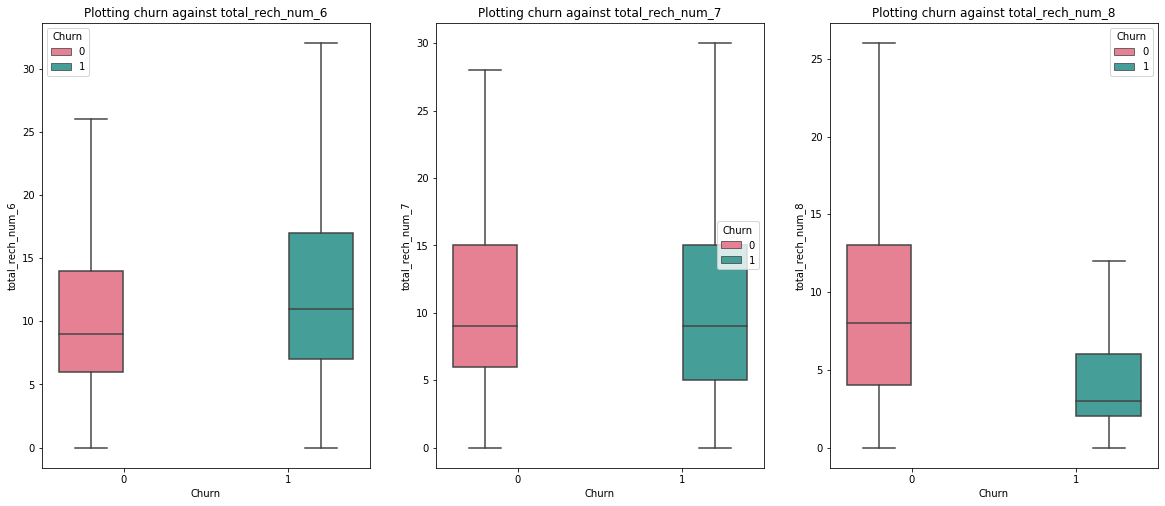

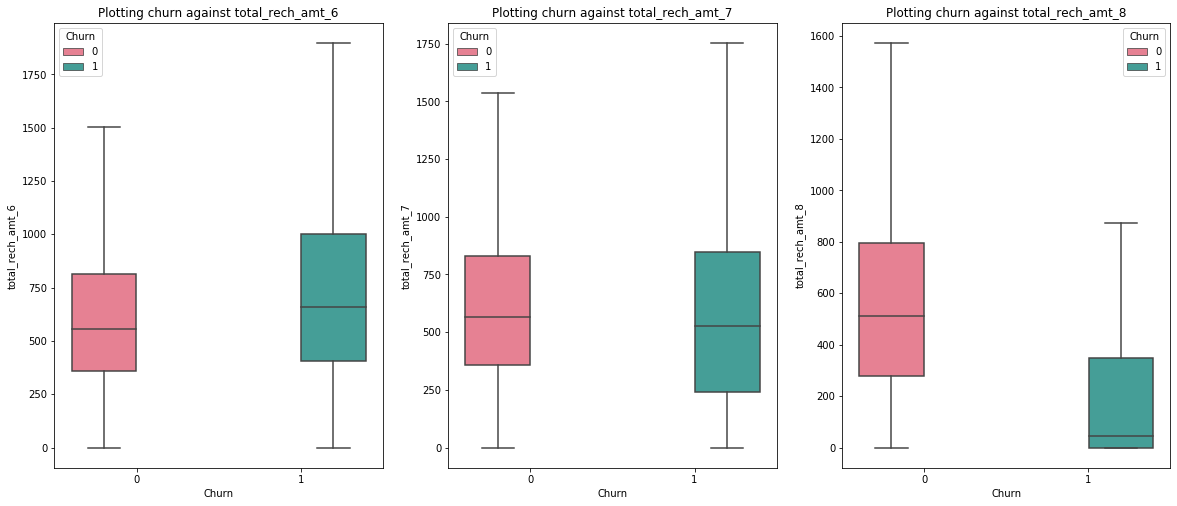

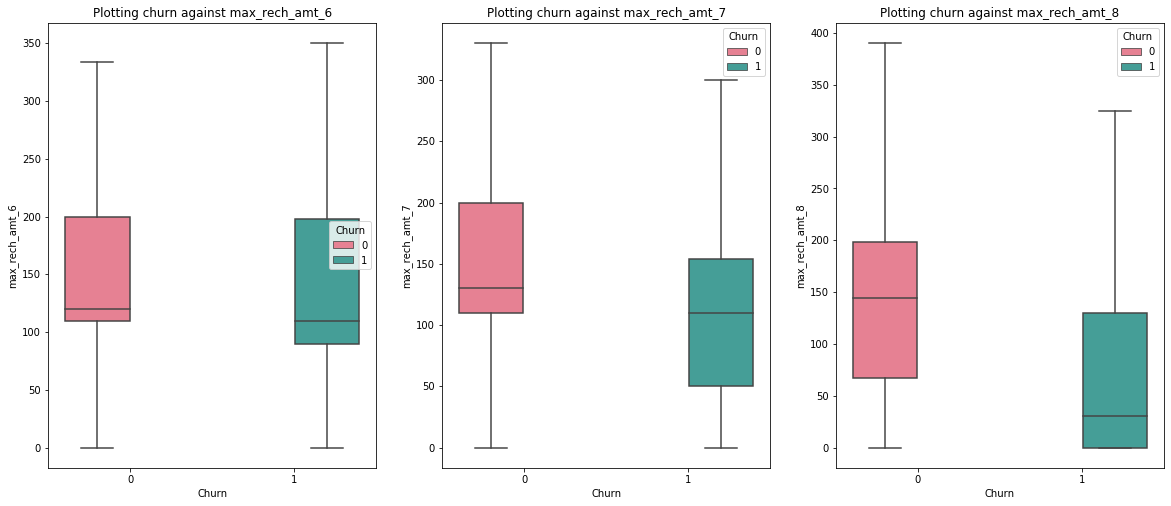

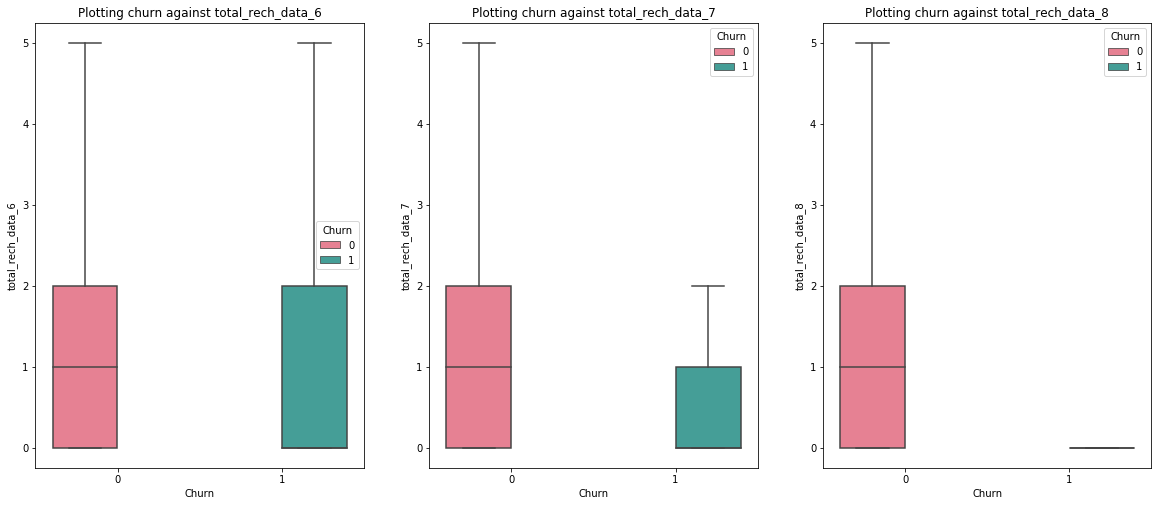

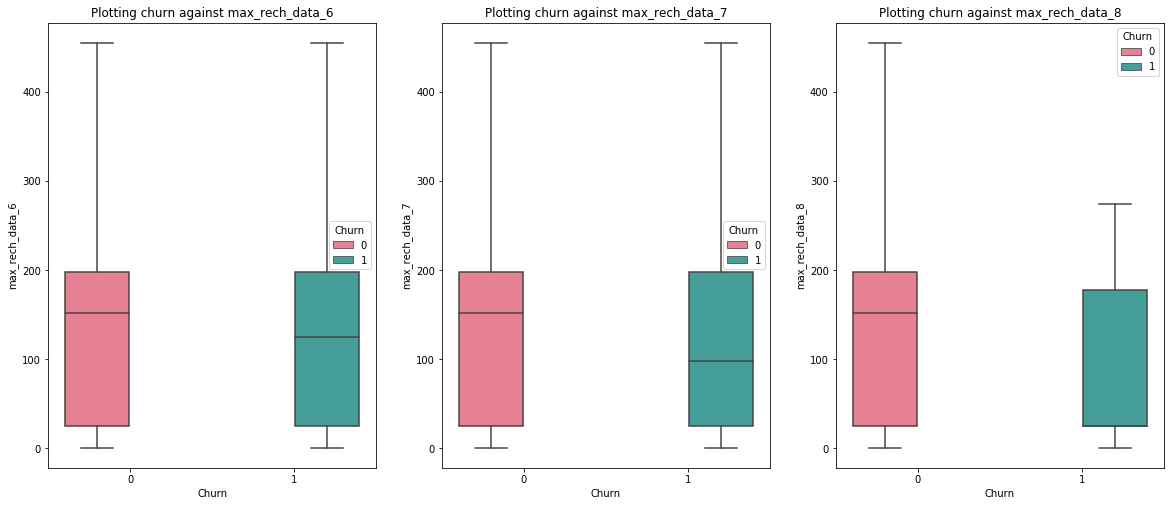

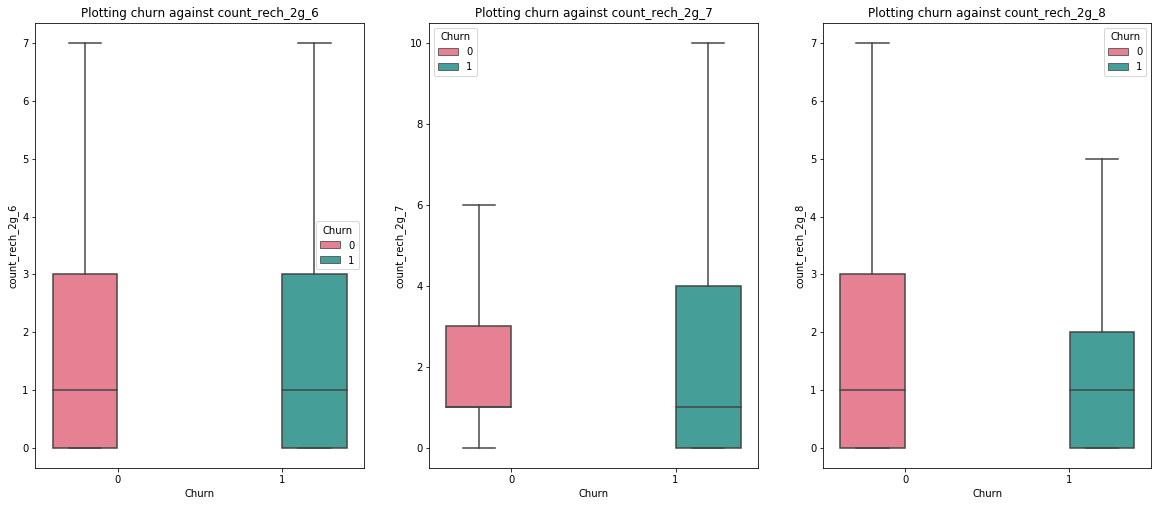

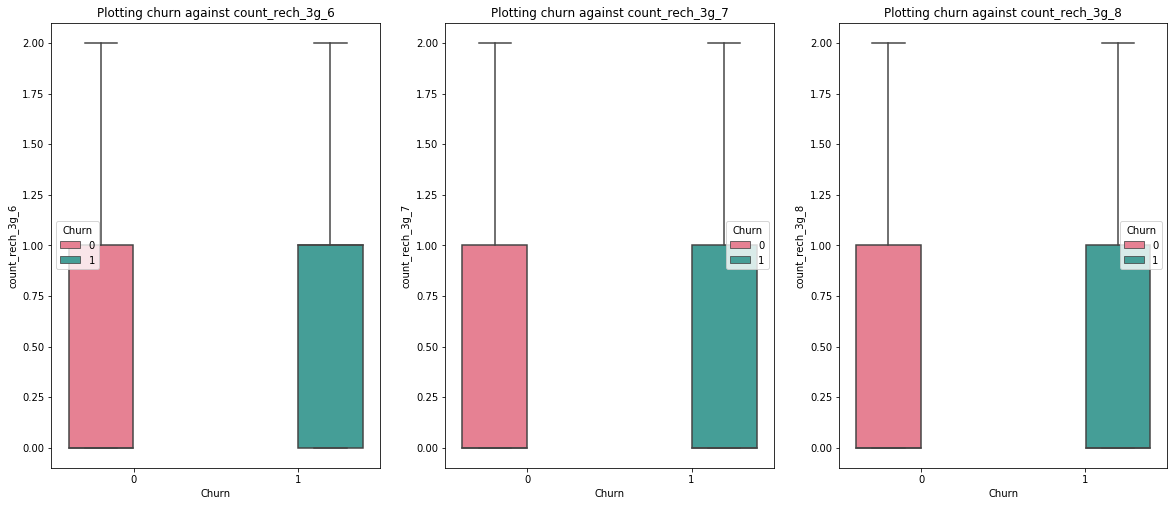

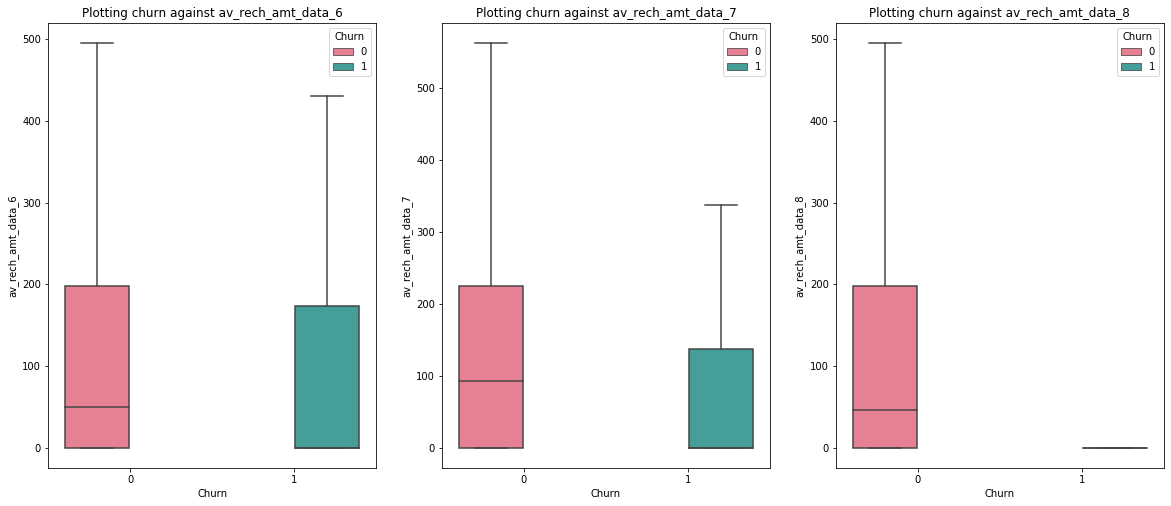

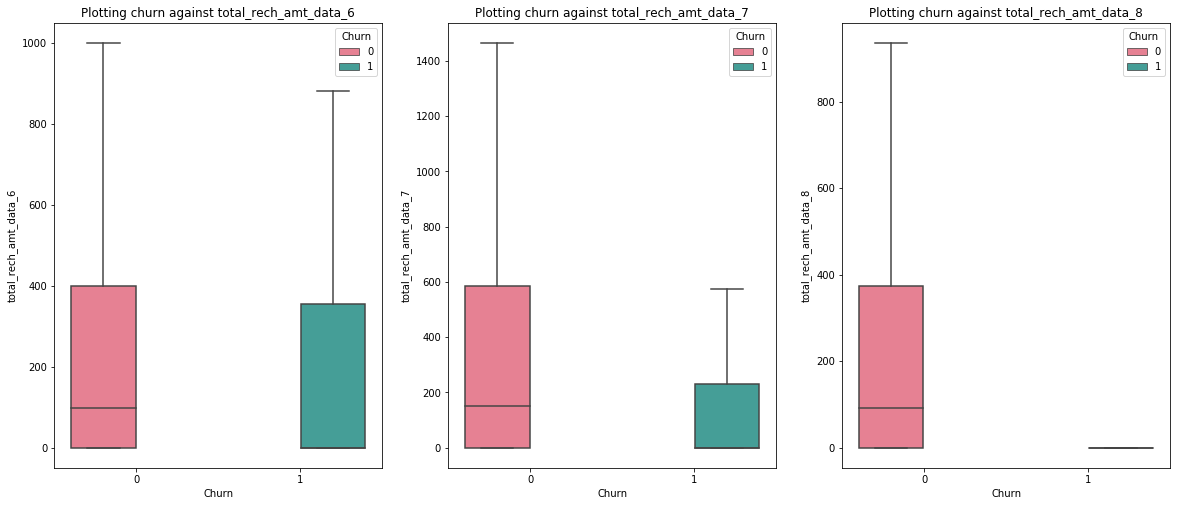

In [26]:
rech_cols = ['total_rech_num','total_rech_amt','max_rech_amt','total_rech_data','max_rech_data','count_rech_2g'
            ,'count_rech_3g','av_rech_amt_data','total_rech_amt_data']
for i in rech_cols:
    cat_box_chart(i)

***`Observations and Insights`***

1. The number of times recharge is performed gradually decreases from 6th to 8th month for the churn customers
2. The amount of recharge is low during 8th month as against 6th and 7th month for the churn customers
3. Total and Average Recharge done for data has almost reduced to zero for churn consumers at 8th month


#### Mising Value Treatment

In [27]:
# Checking the percentage of missing values
cols_with_high_missing_percentage = telecom_hvc.columns[round(100*(telecom_hvc.isnull().sum()/len(telecom_hvc.index)), 2) >= 45.0]
cols_with_high_missing_percentage

Index(['date_of_last_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8',
       'fb_user_8'],
      dtype='object')

Dropping the columns which has more missing data than the threshold

In [28]:
telecom_hvc.drop(cols_with_high_missing_percentage,axis=1,inplace=True)
print('The shape of the data set after removing the columns: '+ str(telecom_hvc.shape))

The shape of the data set after removing the columns: (30001, 156)


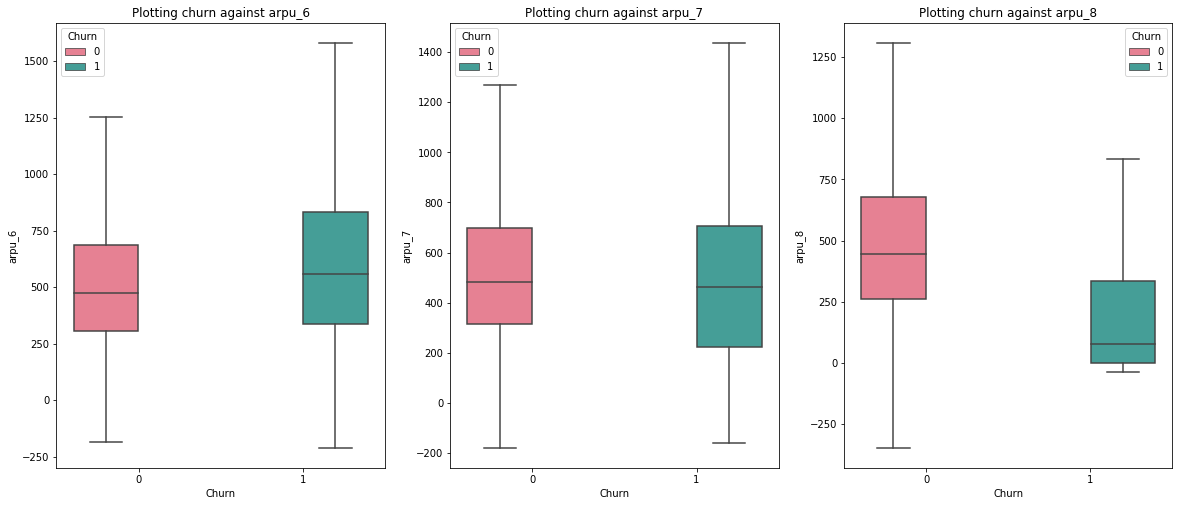

In [29]:
#Plotting Average Revenue per user for 6th, 7th and 8th month
cat_box_chart('arpu')

***Observations***

1. The median of Average revenue per user is around 500 for 6th month and and around 400 for 7th month ***but drastically reduces to almost zero for the action phase (8th month).*** . From the above graph, we can clearly see the arpu reduces drastically for the churn customers at the action phase

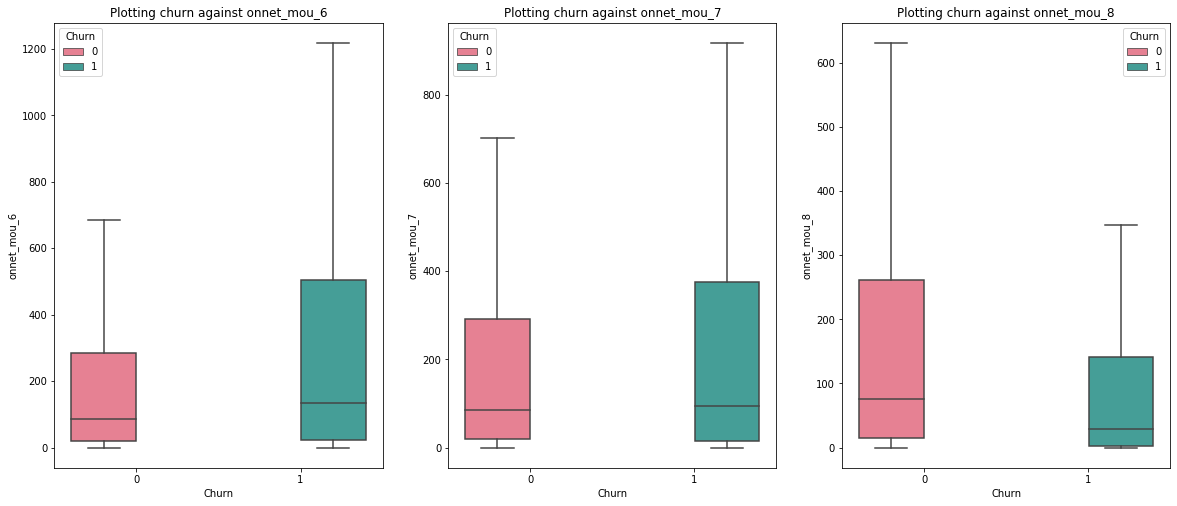

In [30]:
cat_box_chart('onnet_mou')

As seen from the above box plot, the calls within the same operator network reduces drastically during 8th month as compared to 6th and 7th month for the churn customers.

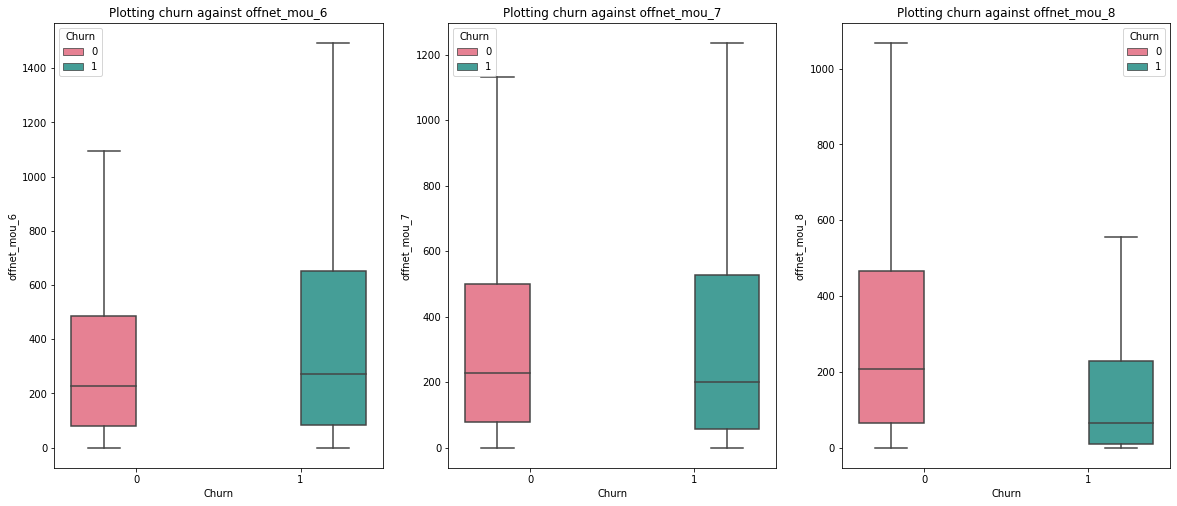

In [42]:
cat_box_chart('offnet_mou')

As seen from the above box plot, the calls across different operator network reduces drastically during 8th month as compared to 6th and 7th month for the churn customers.

***Analysing the relationship between Local calls and Churn Rates***

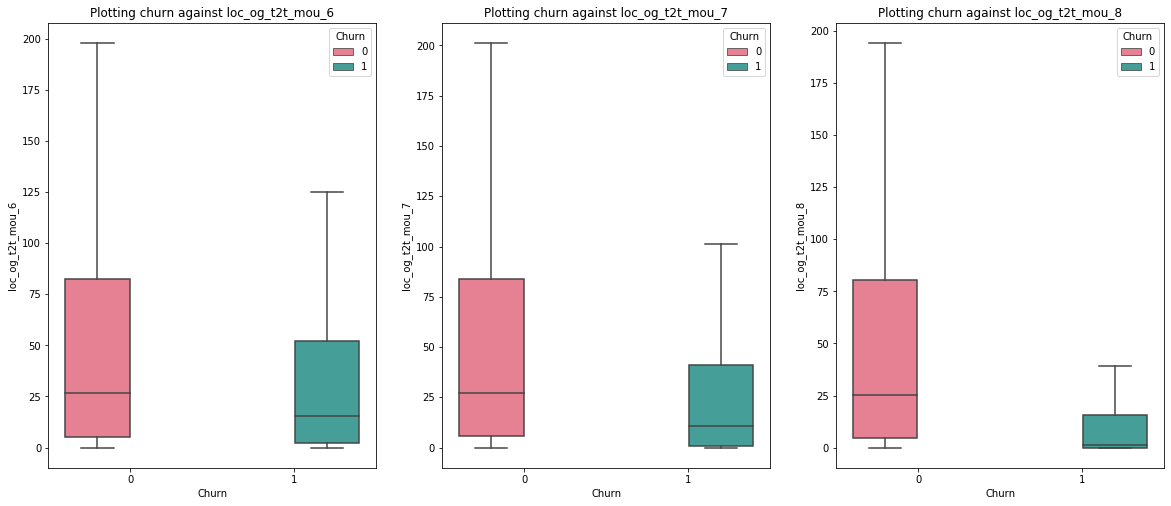

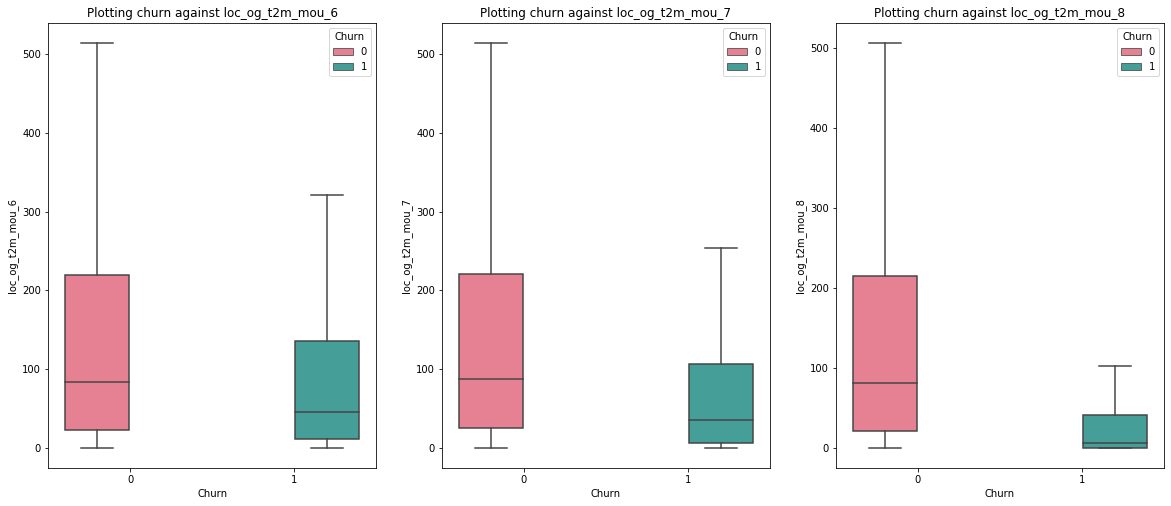

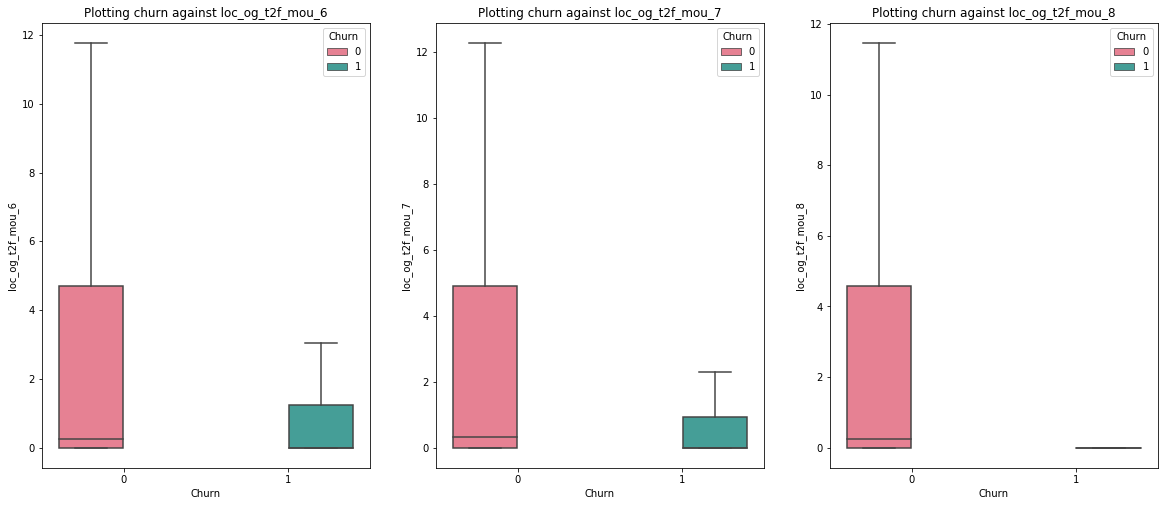

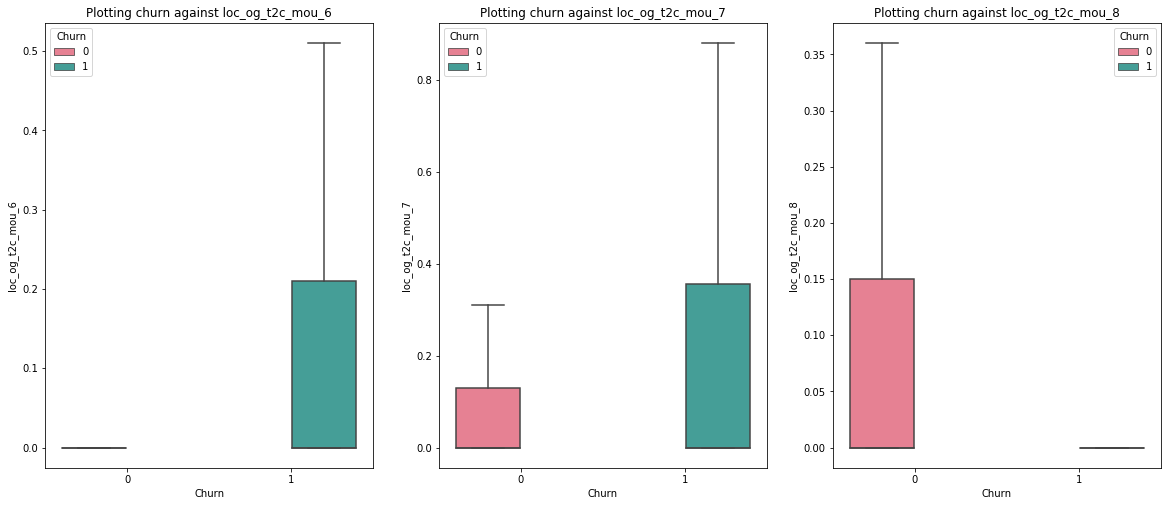

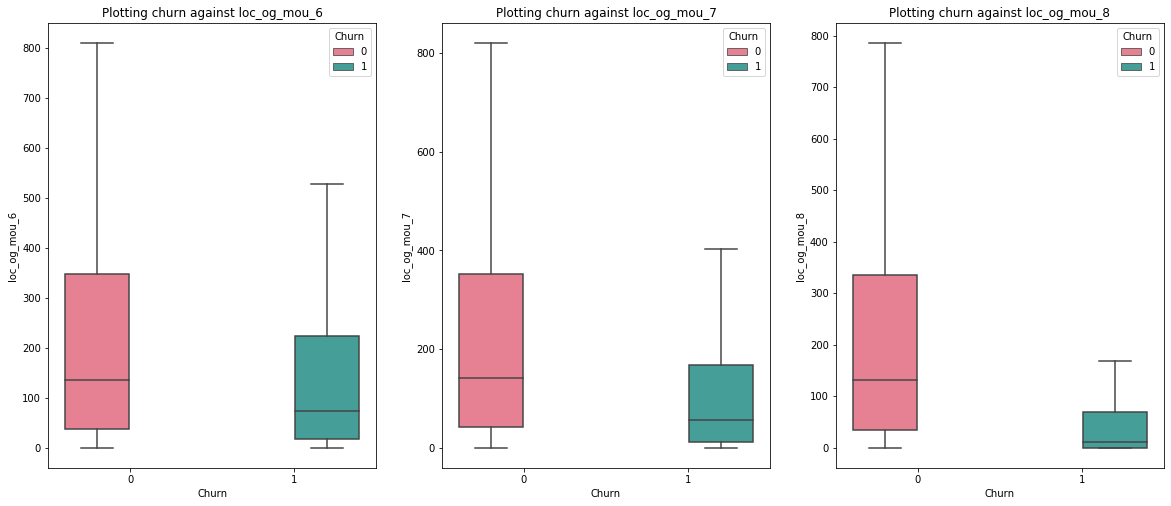

In [44]:
loc_cols = ['loc_og_t2t_mou','loc_og_t2m_mou','loc_og_t2f_mou','loc_og_t2c_mou','loc_og_mou']
for loc in loc_cols:
    cat_box_chart(loc)

As evident from these series of box plots, the local calls irrespective of whether calling within same network, across network,
to landline, consumer's call center is almost neglible during the action phase.

#### Converting date values into date time object

In [51]:
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
             'date_of_last_rech_data_7']

for i in date_cols:
    telecom_hvc[i] = pd.to_datetime(telecom_hvc[i])

In [52]:
telecom_hvc[date_cols]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07
...,...,...,...,...,...
99981,2014-06-17,2014-07-25,2014-08-27,2014-06-17,2014-07-14
99984,2014-06-21,2014-07-31,2014-08-27,2014-06-15,2014-07-31
99986,2014-06-20,2014-07-28,2014-08-18,2014-06-17,2014-07-18
99988,2014-06-30,2014-07-28,2014-08-29,NaT,2014-07-26


In [48]:
#Fetch all the minutes of usage columns
mou_cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('mou')]
#check for null values in these columns
round(100*(telecom_hvc[mou_cols].isnull().sum()/len(telecom_hvc.index)), 2).sort_values(ascending=False)

isd_ic_mou_8        3.91
loc_og_t2m_mou_8    3.91
spl_og_mou_8        3.91
std_og_mou_8        3.91
std_og_t2f_mou_8    3.91
                    ... 
total_ic_mou_8      0.00
total_og_mou_8      0.00
total_og_mou_7      0.00
total_og_mou_6      0.00
total_ic_mou_6      0.00
Length: 81, dtype: float64

**Finding Correlation among Minutes of Use columns**

It will be impossible to understand the correlation from the 81 columns. Hence it is best to break down the minutes of voice into smaller chunks to understand the correlation

In [63]:
#Fetching mou columns for each month seperately
mou_cols_6 = telecom_hvc.columns[telecom_hvc.columns.str.contains('mou_6')]
mou_cols_7 = telecom_hvc.columns[telecom_hvc.columns.str.contains('mou_7')]
mou_cols_8 = telecom_hvc.columns[telecom_hvc.columns.str.contains('mou_8')]

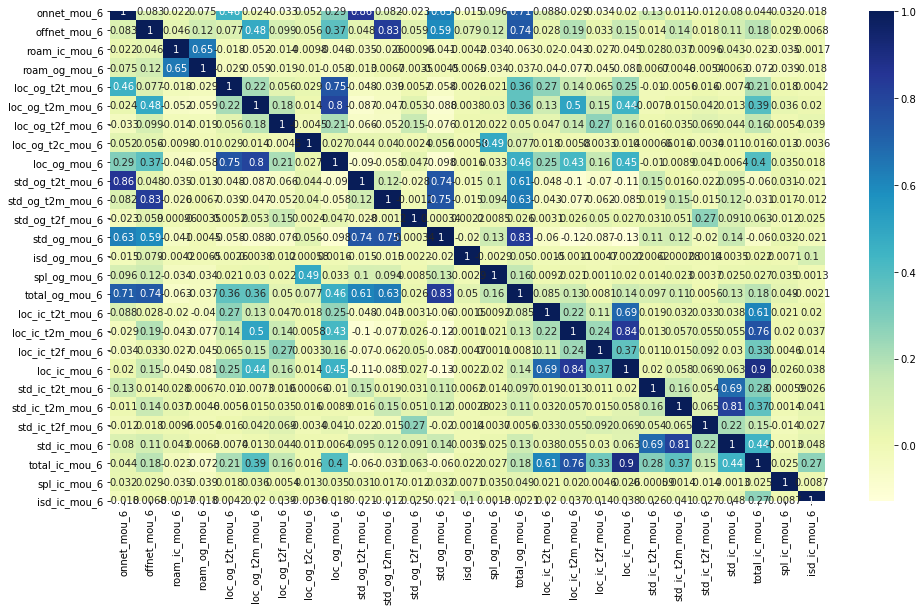

In [65]:
#correlation matrix for 6th month
mou_corr_6 = telecom_hvc[mou_cols_6].corr()
plt.figure(figsize=(16,9))
sns.heatmap(mou_corr_6,annot=True,cmap="YlGnBu")

The following columns are highly correlated
1. loc_ic_mou_6 and total_ic_mou_6 (90%)
2. loc_ic_t2m_mou_6 and total_ic_mou_6 (76%)
3. loc_ic_t2m_mou_6 and loc_ic_mou_6 (84%)
4. std_og_t2t_mou_6 and onnet_mou_6 (86%)
5. std_og_t2m_mou_6 and offnet_mou_6 (83%)
6. total_og_mou_6 and onnet_mou_6 (71%)
7. total_og_mou_6 and offnet_mou_6 (74%)
8. loc_og_mou_6 and loc_og_t2t_mou_6 (76%)
9. loc_og_mou_6 and loc_og_t2m_mou_6 (77%)
10. std_ic_mou_6 and std_ic_t2m_mou_6 (81%)

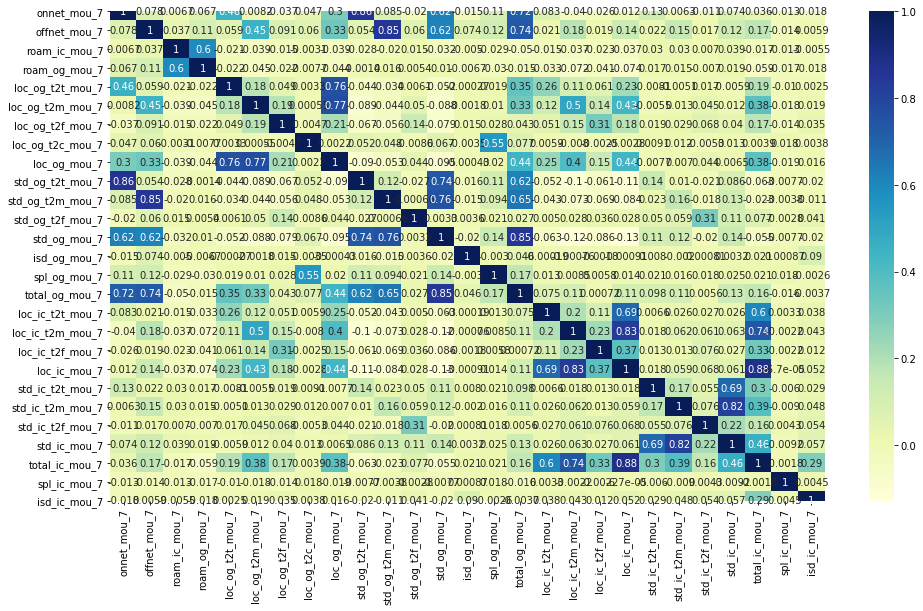

In [67]:
#correlation matrix for 7th month
mou_corr_7 = telecom_hvc[mou_cols_7].corr()
plt.figure(figsize=(16,9))
sns.heatmap(mou_corr_7,annot=True,cmap="YlGnBu")

The same pattern as of 6th month seems to be repeating

1. loc_ic_mou_7 and total_ic_mou_7 (88%)
2. loc_ic_t2m_mou_7 and total_ic_mou_7 (74%)
3. loc_ic_t2m_mou_7 and loc_ic_mou_7 (83%)
4. std_og_t2t_mou_7 and onnet_mou_7 (86%)
5. std_og_t2m_mou_7 and offnet_mou_7 (85%)
6. total_og_mou_7 and onnet_mou_7 (72%)
7. total_og_mou_7 and offnet_mou_7 (74%)
8. loc_og_mou_7 and loc_og_t2t_mou_7 (76%)
9. loc_og_mou_7 and loc_og_t2m_mou_7 (77%)
10. std_ic_mou_7 and std_ic_t2m_mou_7 (82%)

In [72]:
#Dropping highly correlated columns across months as we see a repeat pattern
high_corr_cols = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7',
 'total_ic_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','total_og_mou_6',
 'total_og_mou_7','total_og_mou_8']

telecom_hvc.drop(high_corr_cols,axis=1,inplace=True)

#### Age on Network vs Churn Rate

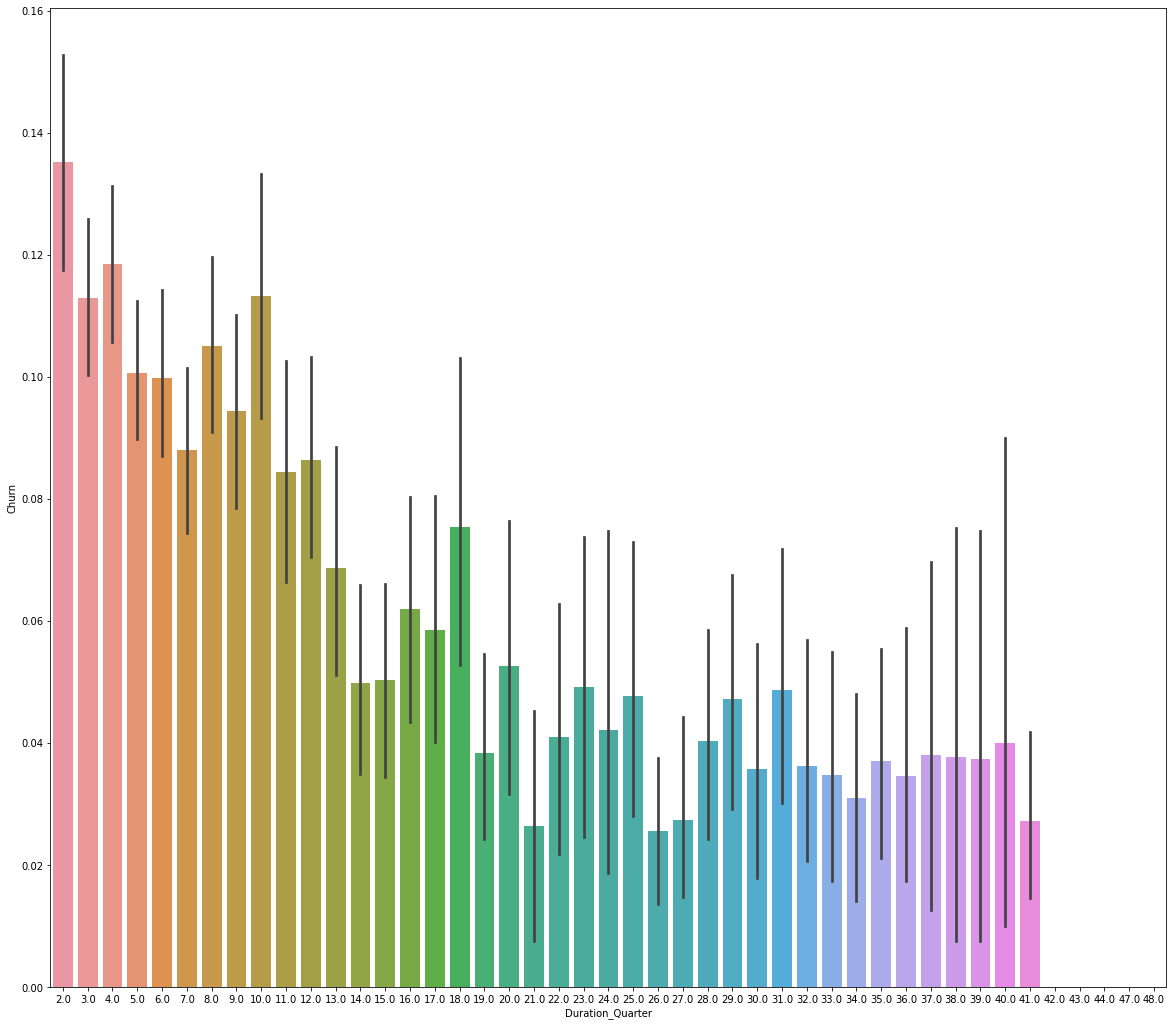

In [83]:
#Creating a derived feature Duration_Quarter out of AON
#Each quarter is of 90 days
telecom_hvc['Duration_Quarter'] = round(telecom_hvc.aon/90,0)
plt.figure(figsize=(20,18))
sns.barplot(data=telecom_hvc,x='Duration_Quarter',y='Churn')
plt.show()

As seen from above bar plot, customers who are present for less than 2 quarters are more likely to churn than the others.
<br>
Customers who are in the network of more than 42 quarters are least likley to churn.

In [91]:
#Columns with more than 40% missing values
cols_40_percent_missing = telecom_hvc.columns[round(100*(telecom_hvc.isnull().sum()/len(telecom_hvc.index)), 2) >= 40.0]
cols_40_percent_missing

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'max_rech_data_6', 'max_rech_data_7', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_3g_6', 'count_rech_3g_7', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6',
       'night_pck_user_7', 'fb_user_6', 'fb_user_7'],
      dtype='object')

In [92]:
#Dropping the columns which has more than 40% missing data
telecom_hvc.drop(cols_40_percent_missing,axis=1,inplace=True)

In [93]:
telecom_hvc.shape

(30001, 123)

In [105]:
#Fetching other Columns with missing values to impute them
cols_with_missing_val = telecom_hvc.columns[round(100*(telecom_hvc.isnull().sum()/len(telecom_hvc.index)), 2) > 0.0]
cols_with_missing_val

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',

Except for a few date columns, others are numeric columns and can be imputed with 0.0

In [108]:
num_cols_mvt = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8']

telecom_hvc[num_cols_mvt].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000
mean,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,16.408431,12.872921,13.009645,27.063178,20.519370,20.674656,86.047905,87.235755,81.256858,166.263652,165.980922,157.937216,6.461494,6.540759,6.126112,1.604247,1.924320,1.777295,168.954534,177.409496,154.486547,182.753296,191.345743,163.758261,1.836917,1.859332,1.649273,2.211703,2.144122,2.028343,5.925921,7.238206,6.824251,0.673323,0.043687,0.059953,66.664313,67.851431,65.169653,153.195349,154.388675,152.188163,15.561152,16.327824,14.989754,15.170365,15.702570,14.480350,29.735390,31.384277,29.059765,2.745734,2.849447,2.666308,0.062165,0.020125,0.027649,10.984229,12.09224,11.446169,1.174790,1.527682,1.274322
std,462.493645,482.972367,465.200856,484.257474,500.807874,486.918550,76.973057,76.454034,75.575865,117.218920,96.933381,106.751862,230.609510,242.427257,231.399901,251.423301,242.754684,236.315181,22.310305,22.125961,19.858510,6.357757,9.238487,7.345047,406.914141,424.347895,404.426554,412.056950,436.816512,416.088724,12.087212,13.095663,11.147419,46.273483,45.957517,45.611669,17.711012,21.964629,20.677329,4.144797,2.701071,3.381939,165.002284,168.678411,161.602601,220.251819,219.252313,217.137562,46.125606,49.563887,44.078609,78.384516,83.769752,72.720335,99.033833,106.540374,105.268386,19.272265,19.687849,20.291213,0.189605,0.183489,0.112796,77.421743,80.89052,71.988368,14.113843,16.141140,13.038515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,19.240000,18.155000,14

In [112]:
#Imputing numericalcolumns with 0 for null values
telecom_hvc[num_cols_mvt] = telecom_hvc[num_cols_mvt].replace(np.nan,0.0)

In [130]:
#Dropping date columns as they are insignificant

date_cols = ['date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8']
telecom_hvc.drop(date_cols,axis=1,inplace=True)

We now have removed/replaced the missing values.

## Step 3: Data Modelling

In [131]:
#import the required modelling packages
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Principal Component Analysis

In [132]:
#Creating a deep copy of telecom_hvc DF and popping the target variable and assigning as y
telecom_pca = telecom_hvc.copy(deep=True)
y = telecom_pca.pop("Churn")

In [133]:
#dropping the mobile number column and then assigning to X
telecom_pca.drop('mobile_number',axis=1,inplace=True)

In [134]:
#Also dropping the following columns as we have merged them into Duration_Quarter
#aon
telecom_pca.drop('aon',axis=1,inplace=True)

In [171]:
#Copying the data frame telecom_pca to X
X = telecom_pca.copy()

In [172]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_col = X.columns
#Scale the train data
scaler = StandardScaler()
X_train[X_col] = scaler.fit_transform(X_train[X_col])
X_test[X_col] = scaler.transform(X_test[X_col])

#Given that only 8% of the data represent Churn, it is a must to perform class balancing
#Initializing SMOTE: Synthetic Minority Over-sampling Technique for class imbalance

smote = SMOTE()
x_tr,y_tr = smote.fit_sample(X_train,y_train)

In [173]:
print('After SMOTE sampling, the count of records is '+str(x_tr.shape[0]))

After SMOTE sampling, the count of records is 38618


In [174]:
#Performing Principal component analysis on sampled data set
pca = PCA(random_state=101)    
x_tr_pca = pca.fit_transform(x_tr)
x_test_pca = pca.transform(X_test)

In [175]:
#Identify the explained variance ratio
pca_evr = np.cumsum(pca.explained_variance_ratio_)

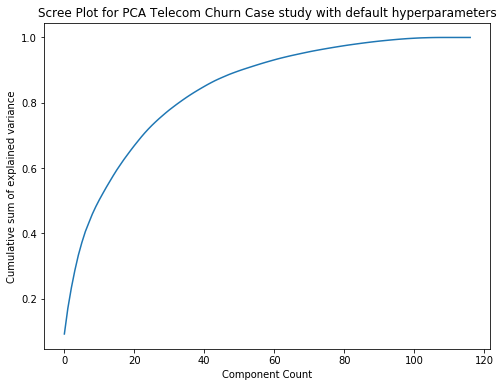

In [176]:
#Plot the exlained variance ratio
plt.figure(figsize = (8,6))
plt.plot(pca_evr)
plt.title('Scree Plot for PCA Telecom Churn Case study with default hyperparameters')
plt.xlabel('Component Count')
plt.ylabel('Cumulative sum of explained variance')
plt.show()

As seen from above plot, 60 components is able to explain almost 90% of the variance. Hence choosing number of components as 60 will be optimal

In [177]:
#Running PCA again with 60 components
pca = PCA(n_components=60)    
x_tr_pca = pca.fit_transform(x_tr)
x_test_pca = pca.transform(X_test)

In [178]:
#Making a data frame out of PCA results for convinience
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':list(X.columns)})
pca_df.head(10)

,PC1,PC2,PC3,Feature
0,0.200226,0.095316,-0.066828,arpu_6
1,0.199397,0.130403,-0.103389,arpu_7
2,0.163029,0.171621,-0.090693,arpu_8
3,0.151709,-0.092598,-0.099025,onnet_mou_6
4,0.150285,-0.065364,-0.117514,onnet_mou_7
5,0.117558,-0.005347,-0.093513,onnet_mou_8
6,0.209217,-0.026382,-0.118439,offnet_mou_6
7,0.209918,0.003391,-0.132191,offnet_mou_7
8,0.148848,0.055080,-0.103308,offnet_mou_8
9,0.153943,0.077059,0.341518,roam_ic_mou_6


In [182]:
#Import packages of other modelling alogorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc,roc_auc_score, roc_curve, recall_score 
from sklearn.metrics import classification_report,recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

### Logistic Regression on PCA Output

In [205]:
#instantiate the logisitic regression
logreg = LogisticRegression()
model = logreg.fit(x_tr_pca,y_tr)

In [227]:
#Making prediction on the test data
y_test_pred = model.predict(x_test_pca)
print("Logistic Regression ROC AUC Score : "+"{:2.2}".format(roc_auc_score(y_test, y_test_pred)))
print("Logistic Regression Accuracy Score : "+"{:2.2}".format(accuracy_score(y_test, y_test_pred)))
print("Logistic Regression Precision Score : "+"{:2.2}".format(precision_score(y_test, y_test_pred)))
print("Logistic Regression Recall Score : "+"{:2.2}".format(recall_score(y_test, y_test_pred)))
print("Logistic Regression F1 Score : "+"{:2.2}".format(f1_score(y_test, y_test_pred)))

Logistic Regression ROC AUC Score : 0.83
Logistic Regression Accuracy Score : 0.83
Logistic Regression Precision Score : 0.3
Logistic Regression Recall Score : 0.83
Logistic Regression F1 Score : 0.45


### Random Forest on PCA Data

In [216]:
#Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
#instantiate RF package with default hyperparameters
rfc = RandomForestClassifier()
rfc.fit(x_tr_pca,y_tr)

RandomForestClassifier()

In [228]:
#Predicting based on x_train_pca
y_test_pred_rf = rfc.predict(x_test_pca)

In [231]:
print('Summary Statistics of Random Forest \n')
print("Random Forest Accuracy Score : "+"{:2.2}".format(accuracy_score(y_test, y_test_pred_rf)))
print("Random Forest Precision Score : "+"{:2.2}".format(precision_score(y_test, y_test_pred_rf)))
print("Random Forest Recall Score : "+"{:2.2}".format(recall_score(y_test, y_test_pred_rf)))
print("Random Forest F1 Score : "+"{:2.2}".format(f1_score(y_test, y_test_pred_rf)))

Summary Statistics of Random Forest 

Random Forest Accuracy Score : 0.91
Random Forest Precision Score : 0.49
Random Forest Recall Score : 0.52
Random Forest F1 Score : 0.51


#### Hyper parameter Tuning on RF Model

**a. Tuning Max Depth**
<br>
Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [236]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_hp = RandomForestClassifier()


# fit tree on training data, n jobs is used to run the search parallely, otherwise the job runs for ages.
rf_hp = GridSearchCV(rf_hp, parameters,n_jobs = -1,
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf_hp.fit(x_tr_pca,y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [237]:
# scores of GridSearch CV
scores = rf_hp.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.894401,1.215167,0.219677,0.034489,2,{'max_depth': 2},0.773563,0.762299,0.775764,0.780914,0.783374,0.775183,0.007333,4,0.784554,0.764323,0.784165,0.784172,0.776242,0.778691,0.007833
1,53.328023,3.920326,0.337611,0.046294,7,{'max_depth': 7},0.851502,0.857198,0.857587,0.859640,0.859252,0.857036,0.002921,3,0.873503,0.872111,0.873568,0.873928,0.872277,0.873077,0.000737
2,79.782332,5.767930,0.484523,0.088984,12,{'max_depth': 12},0.930606,0.926981,0.924909,0.922698,0.925936,0.926226,0.002608,2,0.965106,0.963650,0.964038,0.964428,0.965690,0.964583,0.000734
3,103.372768,10.130187,0.643429,0.037005,17,{'max_depth': 17},0.950673,0.945495,0.948602,0.946394,0.944840,0.947201,0.002152,1,0.987700,0.988509,0.988509,0.987927,0.987927,0.988114,0.000333


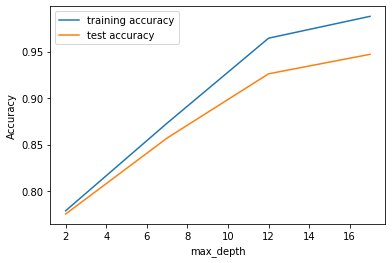

In [238]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the graph, we can see the optimal range of max_depth can be between 12 to 14

**b.Tuning n-estimators**
<br>

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. 
<br>

In [241]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': range(40,50,10)}

# instantiate the model 
rf3 = RandomForestClassifier()


# fit tree on training data
rf3 = GridSearchCV(rf3, parameters, 
                    n_jobs = -1,
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf3.fit(x_tr_pca,y_tr)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': range(40, 50, 10)},
             return_train_score=True, scoring='accuracy')

In [243]:
# scores of GridSearch CV
scores3 = rf3.cv_results_
pd.DataFrame(scores3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,520.819719,3.212376,1.140669,0.201213,40,{'max_features': 40},0.945079,0.946166,0.943599,0.944948,0.001052,1,1.0,1.0,1.0,1.0,0.0


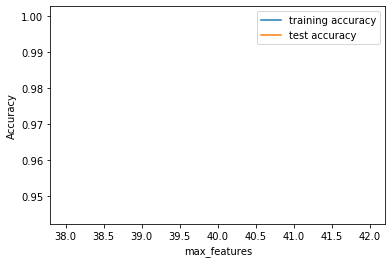

In [245]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores3["param_max_features"], 
         scores3["mean_train_score"], 
         label="training accuracy")
plt.plot(scores3["param_max_features"], 
         scores3["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Optimal Hyperparameters**

`Important Note`

As the grid search with RF takes considerable processing time (at times more than an hour for certain hyperparameters), the data set was ran in multiple different machines parallely to fetch the following optimal hyperparameters

1. max_depth : 12
2. n_estimators : 200
3. max_features : 40
4. min_samples_leaf : [10,20]
5. min_samples_split : [10,20,30]

In [247]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30],
    'n_estimators': [200], 
    'max_features': [40]
}
# Create a based model
rf_final = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_final, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [250]:
#Running the Random forest model with chosen optimal hyper parameters
grid_search.fit(x_tr,y_tr)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 34.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [12], 'max_features': [40],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [200]},
             verbose=1)

In [252]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9364028960649519 using {'max_depth': 12, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 200}


## Final Random Forest Model without PCA

In [253]:
# model with the best hyperparameters
#considering the hyperparameters chosen from above grid search method
rfc_final_no_PCA = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=10, 
                             min_samples_split=20,
                             max_features=40,
                             n_estimators=200)

In [254]:
#Fitting the SMOTE balanced date into the final RF class with optimal hyperparameters
rfc_final_no_PCA.fit(x_tr,y_tr)

RandomForestClassifier(max_depth=12, max_features=40, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200)

In [259]:
# predict the y_test sampled data
y_test_pred_rf_noPCA = rfc_final_no_PCA.predict(X_test)
print('Summary Statistics of Random Forest without PCA \n')
print("Random Forest Accuracy Score : "+"{:2.2}".format(accuracy_score(y_test, y_test_pred_rf_noPCA)))
print("Random Forest Precision Score : "+"{:2.2}".format(precision_score(y_test, y_test_pred_rf_noPCA)))
print("Random Forest Recall Score : "+"{:2.2}".format(recall_score(y_test, y_test_pred_rf_noPCA)))
print("Random Forest F1 Score : "+"{:2.2}".format(f1_score(y_test, y_test_pred_rf_noPCA)))
print('\n\nClassfication Report:\t\n')
print(classification_report(y_test,y_test_pred_rf_noPCA))
print('\n\nConfusion Matrix:\t\n')
print(confusion_matrix(y_test,y_test_pred_rf_noPCA))

Summary Statistics of Random Forest without PCA 

Random Forest Accuracy Score : 0.92
Random Forest Precision Score : 0.51
Random Forest Recall Score : 0.73
Random Forest F1 Score : 0.6


Classfication Report:	

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      8251
           1       0.51      0.73      0.60       750

    accuracy                           0.92      9001
   macro avg       0.74      0.84      0.78      9001
weighted avg       0.94      0.92      0.93      9001



Confusion Matrix:	

[[7731  520]
 [ 200  550]]


***The model behaves optimal with an 92% Accuracy and 0.6 F1 Score on test data***

### Important Features

In [260]:
#creating a DF feature importances to list out the important features listed by Random Forest
feature_importances = pd.DataFrame(rfc_final_no_PCA.feature_importances_,
                                   index = x_tr.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [262]:
#Listing the top 20 features
feature_importances.head(20)

,importance
loc_ic_t2m_mou_8,0.174563
total_rech_amt_8,0.116953
roam_og_mou_8,0.099281
total_rech_data_8,0.067197
roam_ic_mou_8,0.066973
arpu_8,0.052149
last_day_rch_amt_8,0.035940
loc_og_t2m_mou_8,0.035475
loc_ic_t2t_mou_8,0.034747
av_rech_amt_data_8,0.028139


## Insights and Recommendations

1. Local incoming call received from other networks and total recharge amount done during 8th month highly influence Churn behaviour
<br>
2. Both incoming and outgoing roaming calls at action phase strongly indicates the churn ratio.
<br>
3. Average revenue per year at 8th month is another important feature of Churn indicator.
<br>
4. Total Recharge done for data and last day recharge amount are good predictors of Churn as well.
5. Also as seen from Duration Quarter, the customers who are associated with the operator for more than 42 quarters don't churn that easily, whereas the new consumers (2nd to 10th quarter) churn very easily. The operator should announce additional offers for new consumers to reduce the Churn rate.